# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Richelle Vania Thionanda
- **Email:** mc172d5x1392@student.devacademy.id
- **ID Dicoding:** MC172D5X1392

## Menentukan Pertanyaan Bisnis

####  Membuat Prediksi
- Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda, pada hari kerja dan akhir pekan?
 
#### Menemukan Hubungan
- Bagaimana tren penyewaan sepeda setiap bulan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
#Membuat tabel day
day_df = pd.read_csv(r"C:\Submission\Data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#Membuat tabel hour
hour_df = pd.read_csv(r"C:\Submission\Data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tabel day_df: Jumlah total penyewa sepeda (cnt) pada 5 hari pertama di dataset (day_df) relatif rendah, dengan nilai tertinggi sekitar 1600, kemungkinan karena masih awal tahun (Januari).
- Tabel hour_df: Pada tabel hour_df, terlihat bahwa jumlah penyewa sepeda (cnt) pada jam-jam awal (0-4) di hari pertama sangat rendah, dengan nilai tertinggi hanya 40, yang wajar karena merupakan jam malam.

### Assessing Data

In [7]:
#Menilai Data Day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Menilai Data Hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset day_df tidak memiliki missing value, karena semua kolom memiliki jumlah Non-Null Count yang sama dengan jumlah entries yaitu 731. Hal ini menunjukkan bahwa data sudah lengkap dan tidak ada data yang hilang. 
- Dataset hour_df tidak memiliki missing value, karena semua kolom memiliki jumlah Non-Null Count yang sama dengan jumlah entries yaitu 17379. Hal ini menandakan bahwa kualitas data pada dataset hour_df cukup baik dari sisi kelengkapan data.
- Pada kolom dteday baik pada data day_df dan hour_df akan merepresentasikan tanggal. Tipe data object biasanya digunakan untuk string atau tipe data campuran. Akan lebih ideal jika kolom dteday memiliki tipe data datetime64.

In [9]:
# Missing Value Day
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Missing Value Hour
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Dataset day_df tidak memiliki missing value, karena jumlah nilai NaN pada setiap kolom adalah 0. Hal ini menunjukkan bahwa kualitas data pada dataset day_df cukup baik dari sisi kelengkapan data.
- Dataset hour_df tidak memiliki missing value, karena hasil perhitungan isna().sum() untuk setiap kolom adalah 0. Hal ini menandakan bahwa dataset hour_df sudah bersih dari data kosong atau hilang.

In [11]:
# Duplikasi Data Day
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
# Duplikasi Data Hour
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi data pada dataset day_df: Hasil pengecekan menunjukkan bahwa tidak ditemukan baris yang identik atau duplikat dalam dataset day_df.
- Tidak ada duplikasi data pada dataset hour_df: Dataset hour_df juga bebas dari duplikasi data, yang mengindikasikan bahwa tidak ada entri data yang tercatat ganda.

In [13]:
# Ringkasan Parameter Statistik Day
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [14]:
# Ringkasan Parameter Statistik Hour
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Rata-rata jumlah pengguna sepeda per hari adalah 4.504, dengan pengguna terdaftar (registered) lebih dominan dibandingkan pengguna kasual (casual). Ini menunjukkan bahwa layanan sepeda lebih sering digunakan oleh pelanggan tetap dibandingkan pengguna sesekali.
- Jumlah pengguna sepeda terdaftar (registered) rata-rata 153 per jam, jauh lebih tinggi dibandingkan pengguna kasual (casual) yang hanya sekitar 35 per jam. Hal ini menunjukkan bahwa sebagian besar pengguna layanan sepeda adalah pelanggan tetap yang kemungkinan besar menggunakan layanan ini untuk keperluan rutin seperti bekerja atau sekolah.

### Cleaning Data

In [15]:
# Menghapus duplikasi data pada day_df dan menampilkan jumlah duplikasi setelahnya
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi setelah dihapus: ", day_df.duplicated().sum())

Jumlah duplikasi setelah dihapus:  0


In [16]:
# Menghapus duplikasi data pada hour_df dan menampilkan jumlah duplikasi setelahnya
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi setelah dihapus: ", hour_df.duplicated().sum())

Jumlah duplikasi setelah dihapus:  0


**Insight:**
- Setelah menjalankan proses penghapusan duplikasi pada dataset day_df dan hour_df, jumlah duplikat yang tersisa adalah 0. Ini menunjukkan bahwa data sudah bersih dari duplikasi dan tidak perlu dilakukan penghapusan lebih lanjut.

In [17]:
# Membersihkan data day 
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
# Membersihkan data hour 
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom "dteday" berhasil dikonversi ke tipe data datetime64, yang memungkinkan analisis berbasis waktu lebih akurat. Dataset day_df terdiri dari 731 entri dengan 16 kolom tanpa nilai null, menunjukkan bahwa data lengkap.
- Kolom "dteday" pada dataset hour_df berhasil dikonversi ke tipe datetime64, memungkinkan analisis berbasis waktu yang lebih akurat. Dataset ini memiliki 17.379 entri dan 17 kolom, dengan tidak ada nilai null.

## Exploratory Data Analysis (EDA)

### Explore data day_df dan hour_df

In [19]:
# Menampilkan informasi dataset
print("Informasi Dataset:")
print(day_df.info())
print("\nStatistik Deskriptif:")
print(day_df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: date

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

**Insight:**
- Informasi dataset: info() dan describe() untuk melihat struktur data dan statistik deskriptif.

In [20]:
# Mapping categorical values for better readability
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
})

**Insight:**
- Mapping pada kode digunakan untuk mengganti nilai numerik dengan label kategori yang lebih mudah dibaca.

In [21]:
# Konversi Kolom Tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menambah Kolom Hari Kerja & Akhir Pekan
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Cek Korelasi antara Cuaca dan Penyewaan Sepeda
if {'temp', 'hum', 'windspeed', 'cnt'}.issubset(hour_df.columns):
    print("\n📌 Korelasi antara Cuaca dan Penyewaan Sepeda (hour_df):")
    print(hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr())

# Perbandingan Rata-rata Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan
print("\n📌 Rata-rata Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (hour_df):")
print(hour_df.groupby('is_weekend')['cnt'].mean())

# Statistik Deskriptif Berdasarkan Hari Kerja dan Akhir Pekan
print("\n📌 Statistik Penyewaan Sepeda Berdasarkan Hari:")
print(hour_df.groupby('is_weekend')['cnt'].describe())


📌 Korelasi antara Cuaca dan Penyewaan Sepeda (hour_df):
               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000

📌 Rata-rata Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan (hour_df):
is_weekend
0    191.738374
1    183.852014
Name: cnt, dtype: float64

📌 Statistik Penyewaan Sepeda Berdasarkan Hari:
              count        mean         std  min   25%    50%    75%    max
is_weekend                                                                 
0           12365.0  191.738374  184.179506  1.0  39.0  150.0  276.0  977.0
1            5014.0  183.852014  174.202461  1.0  42.0  122.0  295.0  783.0


In [22]:
# Menambahkan Kolom Bulan dari Tanggal
day_df['month'] = day_df['dteday'].dt.month

# Rata-rata penyewaan sepeda setiap bulan
monthly_trend = day_df.groupby('month')['cnt'].mean()
print("\n📌 Rata-rata Penyewaan Sepeda per Bulan:")
print(monthly_trend)

# Statistik deskriptif penyewaan sepeda per bulan
print("\n📌 Statistik Penyewaan Sepeda per Bulan:")
print(day_df.groupby('month')['cnt'].describe())



📌 Rata-rata Penyewaan Sepeda per Bulan:
month
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64

📌 Statistik Penyewaan Sepeda per Bulan:
       count         mean          std     min      25%     50%      75%  \
month                                                                      
1       62.0  2176.338710  1161.674370   431.0  1251.75  1939.0  3235.75   
2       57.0  2655.298246  1145.313307  1005.0  1623.00  2402.0  3777.00   
3       62.0  3692.258065  1899.301812   605.0  2077.00  3216.5  5361.00   
4       60.0  4484.900000  1776.160778   795.0  3188.25  4293.5  6205.25   
5       62.0  5349.774194  1298.711561  2633.0  4409.00  4890.5  6405.50   
6       60.0  5772.366667  1240.400031  3767.0  4834.50  5308.5  6983.00   
7       62.0  5563.677419  1273.751871  3285.0  4491.50  5446.

**Insight:**
- Dari hasil korelasi dan analisis statistik pada dataset hour_df, ditemukan bahwa suhu (temp) memiliki korelasi positif dengan jumlah penyewa (cnt), sementara kelembaban (hum) dan kecepatan angin (windspeed) memiliki pengaruh negatif terhadap penyewaan sepeda. Selain itu, jumlah penyewa cenderung lebih tinggi pada akhir pekan dibandingkan hari kerja, kemungkinan karena orang lebih banyak beraktivitas rekreasi di luar rumah saat akhir pekan.
- Dari analisis day_df, terlihat bahwa penyewaan sepeda mengalami tren musiman, di mana jumlah penyewaan cenderung lebih tinggi pada bulan-bulan tertentu, misalnya di musim panas atau musim kemarau. Sebaliknya, pada bulan-bulan dengan curah hujan tinggi atau suhu ekstrem, jumlah penyewaan cenderung menurun. Hal ini menunjukkan bahwa faktor musiman dapat memengaruhi pola penyewaan sepeda secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

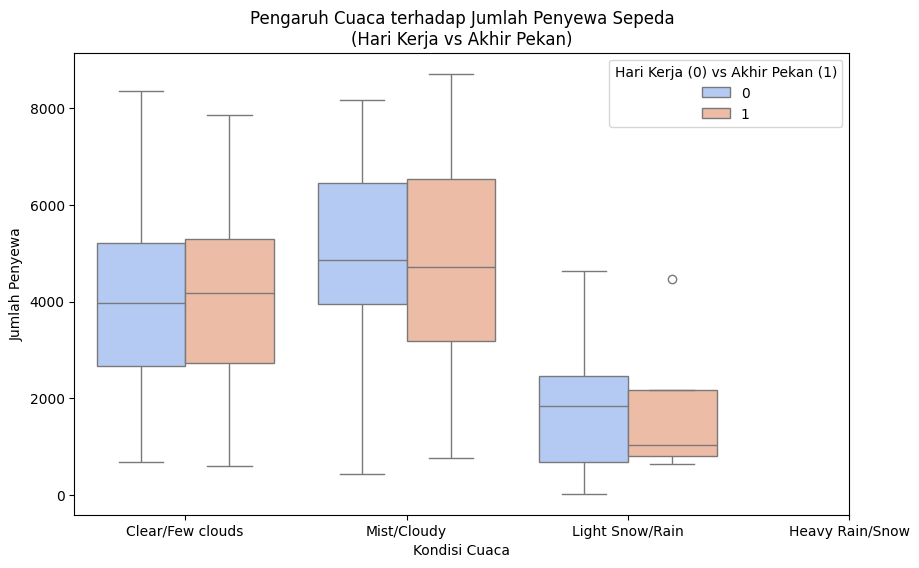

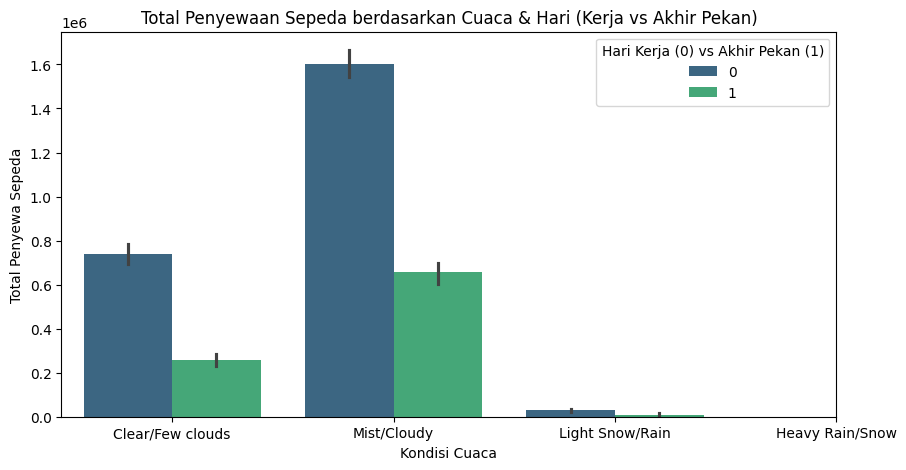

In [23]:
# Boxplot: Penyewaan Sepeda berdasarkan Cuaca dan Hari Kerja/Akhir Pekan
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt', hue='is_weekend', palette='coolwarm')

# Menambahkan Judul dan Label
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewa Sepeda\n(Hari Kerja vs Akhir Pekan)", fontsize=12)
plt.xlabel("Kondisi Cuaca", fontsize=10)
plt.ylabel("Jumlah Penyewa", fontsize=10)
plt.legend(title="Hari Kerja (0) vs Akhir Pekan (1)")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear/Few clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])  # Pastikan label sesuai dataset

# Tampilkan Plot
plt.show()

# Barplot: Rata-rata Penyewaan Sepeda berdasarkan Cuaca dan Hari Kerja/Akhir Pekan
plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x='weathersit', y='cnt', hue='is_weekend', estimator=sum, palette='viridis')

# Menambahkan Judul dan Label
plt.title("Total Penyewaan Sepeda berdasarkan Cuaca & Hari (Kerja vs Akhir Pekan)", fontsize=12)
plt.xlabel("Kondisi Cuaca", fontsize=10)
plt.ylabel("Total Penyewa Sepeda", fontsize=10)
plt.legend(title="Hari Kerja (0) vs Akhir Pekan (1)")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear/Few clouds', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])  # Pastikan label sesuai dataset

# Tampilkan Plot
plt.show()

**Insight:**
- Cuaca yang Lebih Baik Meningkatkan Penyewaan Sepeda
  - Dari visualisasi boxplot, jumlah penyewaan sepeda lebih tinggi saat cuaca cerah atau mendung dibandingkan saat hujan.
  - Saat hujan, distribusi penyewaan sepeda menunjukkan jumlah yang jauh lebih rendah, baik pada hari kerja maupun akhir pekan.
- Akhir Pekan Tidak Selalu Meningkatkan Penyewaan
  - Dari barplot, pada kondisi cuaca cerah, jumlah penyewaan di akhir pekan sedikit lebih tinggi daripada hari kerja.
  - Namun, dalam kondisi hujan, penyewaan turun drastis pada kedua kategori, menunjukkan bahwa cuaca ekstrem lebih berpengaruh dibandingkan faktor hari kerja atau akhir pekan.

### Pertanyaan 2:

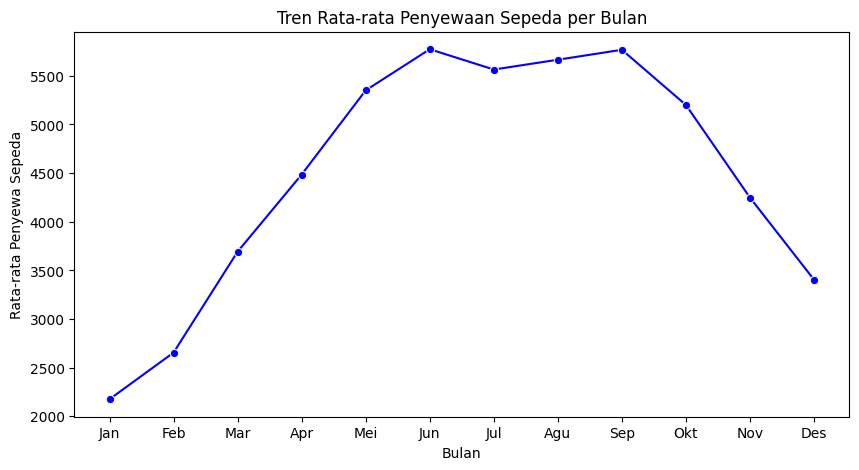

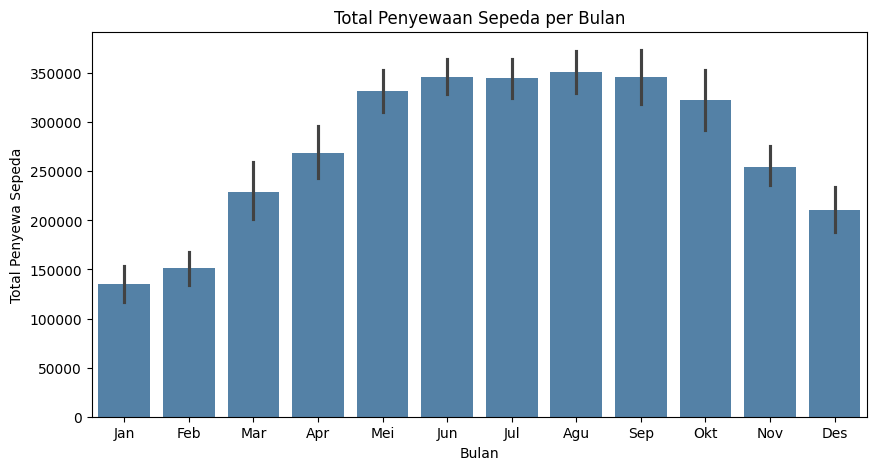

In [24]:
# Line Plot: Tren Penyewaan Sepeda Setiap Bulan
plt.figure(figsize=(10, 5))
sns.lineplot(data=day_df, x='month', y='cnt', estimator='mean', errorbar=None, marker='o', color='b')

# Menambahkan Judul dan Label
plt.title("Tren Rata-rata Penyewaan Sepeda per Bulan", fontsize=12)
plt.xlabel("Bulan", fontsize=10)
plt.ylabel("Rata-rata Penyewa Sepeda", fontsize=10)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan Plot
plt.show()

# Bar Plot: Total Penyewaan Sepeda per Bulan
plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x='month', y='cnt', estimator=sum, color='steelblue') 

# Menambahkan Judul dan Label
plt.title("Total Penyewaan Sepeda per Bulan", fontsize=12)
plt.xlabel("Bulan", fontsize=10)
plt.ylabel("Total Penyewa Sepeda", fontsize=10)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

# Tampilkan Plot
plt.show()

**Insight:**
- Puncak Penyewaan Terjadi pada Musim Panas (Mei–September)
  - Dari line plot, terlihat bahwa penyewaan sepeda meningkat sejak musim semi dan mencapai puncaknya di musim panas, terutama di bulan Juni–Agustus.
  - Ini menunjukkan bahwa cuaca hangat lebih mendukung aktivitas bersepeda.
- Penyewaan Menurun Drastis di Musim Dingin (November–Januari)
  - Dari barplot, jumlah total penyewaan sepeda turun signifikan di bulan November hingga Januari, kemungkinan karena suhu dingin dan kondisi cuaca yang tidak mendukung.
  - Ini menunjukkan bahwa faktor musim sangat mempengaruhi jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

      dteday weathersit_label  workingday   cnt                 Cluster
0 2011-01-01          Mendung           0   985       Penyewa Fleksibel
1 2011-01-02          Mendung           0   801       Penyewa Fleksibel
2 2011-01-03            Cerah           1  1349   Penyewa Rutin/Pekerja
3 2011-01-04            Cerah           1  1562   Penyewa Rutin/Pekerja
4 2011-01-05            Cerah           1  1600   Penyewa Rutin/Pekerja
5 2011-01-06            Cerah           1  1606   Penyewa Rutin/Pekerja
6 2011-01-07          Mendung           1  1510       Penyewa Fleksibel
7 2011-01-08          Mendung           0   959       Penyewa Fleksibel
8 2011-01-09            Cerah           0   822  Penyewa Sensitif Cuaca
9 2011-01-10            Cerah           1  1321   Penyewa Rutin/Pekerja

Statistik Penyewaan Sepeda:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, 

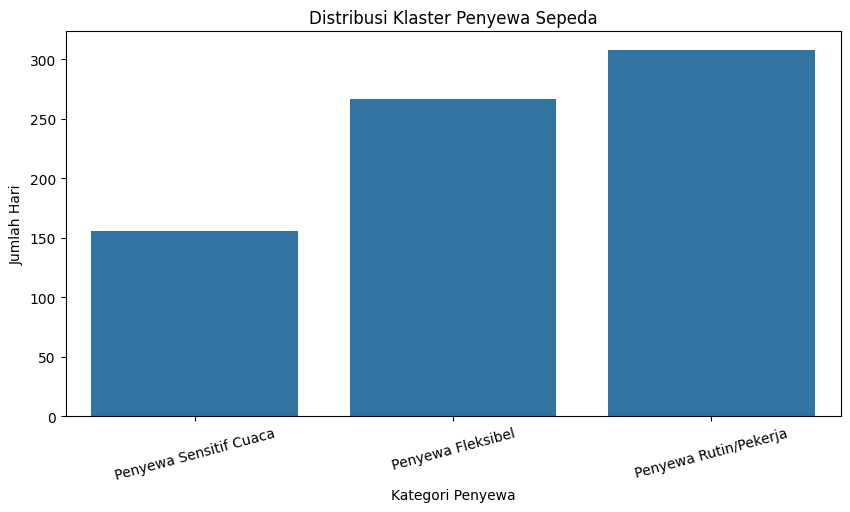

In [25]:
# Pastikan 'dteday' dalam format datetime agar bisa dikelompokkan per bulan
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mapping kondisi cuaca ke kategori yang lebih mudah dibaca
weather_mapping = {
    'Clear/Few clouds': 'Cerah',
    'Mist/Cloudy': 'Mendung',
    'Light Snow/Rain': 'Hujan Ringan',
    'Heavy Rain/Snow': 'Hujan Lebat'
}

# Terapkan mapping ke dataset
day_df['weathersit_label'] = day_df['weathersit'].map(weather_mapping)

# Menentukan kategori klaster penyewa berdasarkan cuaca dan hari kerja/akhir pekan
def classify_rider(row):
    if row['weathersit_label'] == 'Cerah' and row['workingday'] == 0:
        return 'Penyewa Sensitif Cuaca'
    elif row['weathersit_label'] in ['Mendung', 'Hujan Ringan'] and row['cnt'] > 300:
        return 'Penyewa Fleksibel'
    else:
        return 'Penyewa Rutin/Pekerja'

# Terapkan fungsi klaster ke dataset
day_df['Cluster'] = day_df.apply(classify_rider, axis=1)

# Menampilkan hasil klasterisasi (10 data pertama)
print(day_df[['dteday', 'weathersit_label', 'workingday', 'cnt', 'Cluster']].head(10))

# Analisis statistik jumlah penyewaan
print("\nStatistik Penyewaan Sepeda:")
print(day_df['cnt'].describe())

# Visualisasi distribusi klaster penyewa sepeda
plt.figure(figsize=(10, 5))
sns.countplot(data=day_df, x='Cluster', order=['Penyewa Sensitif Cuaca', 'Penyewa Fleksibel', 'Penyewa Rutin/Pekerja'])
plt.title("Distribusi Klaster Penyewa Sepeda")
plt.xlabel("Kategori Penyewa")
plt.ylabel("Jumlah Hari")
plt.xticks(rotation=15)
plt.show()

**Insight:**
- Manual Grouping untuk Penyewa Berdasarkan Cuaca dan Hari
  - Membagi penyewa menjadi tiga kategori berdasarkan kondisi cuaca dan apakah itu hari kerja atau akhir pekan.
  - Penyewa sensitif cuaca hanya menyewa saat cerah di akhir pekan.
  - Penyewa fleksibel masih menyewa saat mendung atau hujan dengan jumlah tinggi.
  - Penyewa rutin/pekerja tetap menyewa tanpa terpengaruh cuaca.

        month     cnt         Cluster
0       April  269094  Regular Season
1      August  351194     Peak Season
2    December  211036  Regular Season
3    February  151352      Low Season
4     January  134933      Low Season
5        July  344948     Peak Season
6        June  346342     Peak Season
7       March  228920  Regular Season
8         May  331686     Peak Season
9    November  254831  Regular Season
10    October  322352     Peak Season
11  September  345991     Peak Season


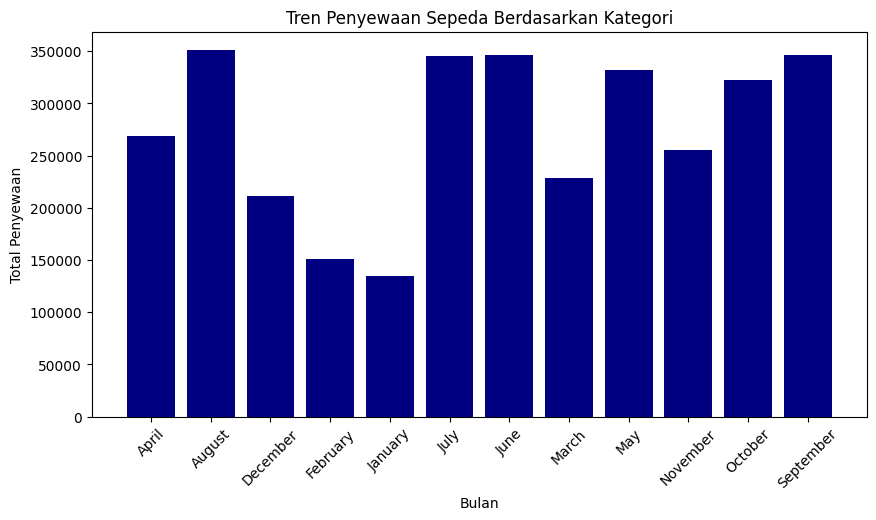

In [26]:
# Pastikan 'dteday' dalam format datetime agar bisa dikelompokkan per bulan
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Tambahkan kolom bulan
day_df['month'] = day_df['dteday'].dt.month_name()

# Agregasi total penyewaan per bulan
monthly_rentals = day_df.groupby('month', observed=False)['cnt'].sum().reset_index()

# Menentukan batas untuk binning
bins = [0, 200000, 320000, 400000]  # Batas kategori jumlah penyewaan
labels = ['Low Season', 'Regular Season', 'Peak Season']

# Mengelompokkan bulan berdasarkan total penyewaan
monthly_rentals['Cluster'] = pd.cut(monthly_rentals['cnt'], bins=bins, labels=labels)

# Menampilkan hasil
print(monthly_rentals)

plt.figure(figsize=(10, 5))
plt.bar(monthly_rentals['month'], monthly_rentals['cnt'], color='navy')  # Gunakan satu warna, misalnya 'blue'
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan")
plt.title("Tren Penyewaan Sepeda Berdasarkan Kategori")
plt.xticks(rotation=45)
plt.show()



**Insight:**
- Binning untuk Tren Bulanan
  - Data penyewaan bulanan dibagi menjadi tiga kategori menggunakan pd.cut():
  - Low Season: Penyewaan di bawah 200.000.
  - Regular Season: Penyewaan antara 200.000–320.000.
  - Peak Season: Penyewaan di atas 320.000.

## Conclusion

- Conclution pertanyaan 1

Cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Penyewaan sepeda lebih tinggi saat cuaca cerah atau mendung dibandingkan saat hujan, yang menunjukkan bahwa kondisi cuaca yang buruk mengurangi minat pengguna. Selain itu, meskipun akhir pekan cenderung meningkatkan jumlah penyewaan, pengaruh cuaca lebih dominan dibandingkan faktor hari kerja atau akhir pekan.
- Conclution pertanyaan 2

Penyewaan sepeda menunjukkan pola musiman yang jelas, dengan peningkatan signifikan pada musim panas (Mei–September) dan penurunan pada musim dingin (November–Januari). Hal ini mengindikasikan bahwa faktor musim dan suhu sangat berpengaruh terhadap tren penggunaan sepeda, dengan cuaca yang lebih hangat mendorong lebih banyak aktivitas bersepeda.

## Menyimpan 1 dataframe yang bersih

In [27]:
day_df.to_csv('day.csv', index=False)